<a href="https://colab.research.google.com/github/biplab37/Masters-Thesis/blob/master/code/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# numerical solution for the differential equation of velocity
---

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def vel(phi,momentum,cutoff,epsilon):
    cphi = np.cos(phi)
    return cphi/(epsilon*momentum*np.sqrt(1 - 2*cphi*momentum/cutoff + (momentum/cutoff)**2))

def dielectric(phi,momentum,cutoff,vel_1,vel_2):
    cphi = np.cos(phi)
    sphi = np.sin(phi)
    return 2*pi*(momentum*sphi**2)/(((vel_1+vel_2)*cutoff + momentum*vel_2*cphi)*np.sqrt(-momentum**2*sphi**2 + 4*cutoff**2+ 4*momentum*cutoff*cphi))

In [0]:
n = 200
m = 23
num = 1000
dcutoff = 1./n
pi = 3.1415
velocity = np.ones((n,m))
eps = np.ones((n,m))

for i in range(n-1):
    cutoff = (n-i-1)/n
    for j in range(m):
        momentum = (j+1)/m
        integral_vel = 0
        integral_eps = 0
        for k in range(num):
            phi = k*pi/num
            cphi = np.cos(phi)
            k1 = n-1
            if cutoff + momentum*cphi<1:
                k1 = int((cutoff+momentum*cphi)*m)
            if cphi>1-(2*cutoff/momentum):
                integral_eps += dielectric(phi/2,momentum,cutoff,velocity[n-i-1][j],velocity[k1][j])
            integral_vel += vel(phi,momentum,cutoff,eps[n-i-1][j])
        velocity[n-i-2][j] = velocity[n-i-1][j] + dcutoff*integral_vel/num
        eps[n-i-2][j] = eps[n-i-1][j] + dcutoff*integral_eps/num


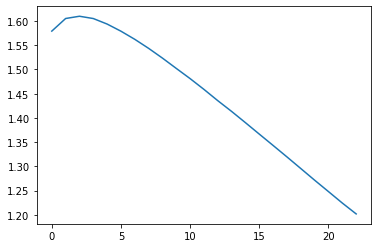

In [48]:
plt.plot(range(m),eps[0,:])

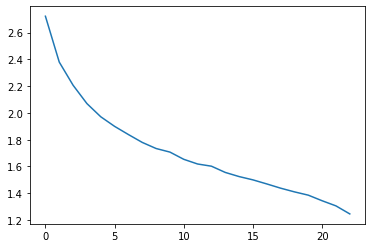

In [49]:
plt.plot(range(m),velocity[0])